In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'tuple'>
('0', '1', '1', '1', '1', '0', '0', '0')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ A ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import *
from utils.nxcs_utils import *

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=7000,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_maze_metrics)

XNCScfg = XNCSConfig(number_of_actions=8,
                    max_population=7000,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=100)


In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 1
explore = 0
exploit = 2500

df_other = XNCSExp(
    maze=maze,
    cfg=XNCScfg,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=True
    )

df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=explore,
             exploit_trials=exploit,
             pre_generate=True
           )



Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 10.801801399999995, 'numerosity': 7000, 'population': 5837, 'average_specificity': 8.09457142857143, 'fraction_accuracy': 1.0, 'knowledge': 8.904109589041095}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 4, 'reward': 1268.4393400342683, 'perf_time': 0.23171939999997448, 'numerosity': 7000, 'population': 5424, 'average_specificity': 11.808, 'fraction_accuracy': 0.98, 'knowledge': 8.904109589041095}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 17, 'reward': 1002.9634080602486, 'perf_time': 1.1649275999999986, 'numerosity': 7000, 'population': 5232, 'average_specificity': 18.535, 'fraction_accuracy': 1.0, 'knowledge': 10.273972602739725}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 3, 'reward': 1640.090458495578, 'perf_time': 0.13137119999998959, 'numerosity': 7000, 'population': 5163, 'average_specificity': 21.890285714285714, 'fraction_accuracy': 1.0, 'knowledge': 10.27397

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 8.758626399999912, 'population': 5867, 'numerosity': 7000, 'average_specificity': 8.529142857142856, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 5, 'reward': 1203.5822709802917, 'perf_time': 0.35878309999998237, 'population': 5463, 'numerosity': 7000, 'average_specificity': 7.843571428571429, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 2, 'reward': 1527.2565917893598, 'perf_time': 0.09319830000004004, 'population': 5302, 'numerosity': 7000, 'average_specificity': 8.445285714285715, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 10, 'reward': 1058.0534669749482, 'perf_time': 0.7575213999998596, 'population': 5257, 'numerosity': 7000, 'average_specificity': 8.827142857142857, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 4, 'reward': 1293.9856774060174, 'perf_time': 0.509301300000061, 

In [5]:
df['steps_in_trial_other']=df_other['steps_in_trial']
df['population_other']=df_other['population']
df['numerosity_other']=df_other['numerosity']
df['average_specificity_other']=df_other['average_specificity']
df['fraction_accuracy_other']=df_other['fraction_accuracy']
df['knowledge_other']=df_other['knowledge']

display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,knowledge,steps_in_trial_other,population_other,numerosity_other,average_specificity_other,fraction_accuracy_other,knowledge_other
trial,,,,,,,,,,,,,
0,100,0.000000,8.758626,5867,7000,8.529143,100.0,100,5837,7000,8.094571,1.00,8.904110
100,6,1132.371203,0.440872,5571,7000,8.101857,100.0,5,5532,7000,8.196571,1.00,8.904110
200,5,1203.582271,0.358783,5463,7000,7.843571,100.0,4,5424,7000,11.808000,0.98,8.904110
300,8,1102.981508,1.255452,5400,7000,7.811571,100.0,17,5319,7000,15.260000,1.00,8.904110
400,7,1103.010512,0.268604,5348,7000,7.952857,100.0,13,5264,7000,17.081143,0.99,8.904110
500,2,1527.256592,0.093198,5302,7000,8.445286,100.0,17,5232,7000,18.535000,1.00,10.273973
600,6,1128.750812,0.413180,5295,7000,8.691000,100.0,15,5191,7000,20.499143,1.00,9.589041
700,10,1058.053467,0.757521,5257,7000,8.827143,100.0,3,5163,7000,21.890286,1.00,10.273973
800,2,1895.648471,0.087332,5242,7000,8.991714,100.0,17,5139,7000,22.749429,1.00,9.589041


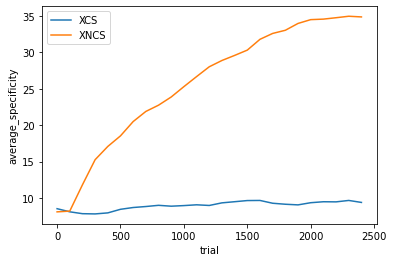

In [6]:
import pandas as pd
import numpy as np

ax = df[['average_specificity', "average_specificity_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS"])

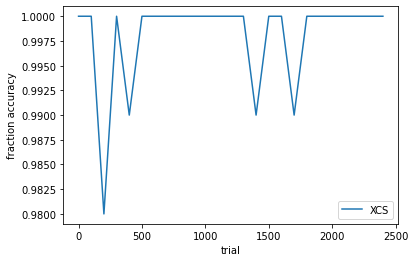

In [7]:
ax = df["fraction_accuracy_other"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XCS","XNCS"])

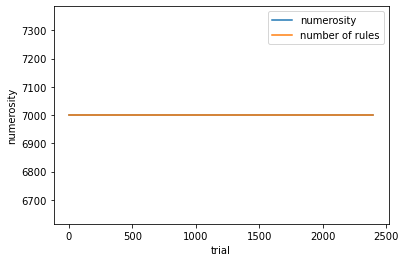

In [8]:
ax = df[['numerosity', 'numerosity_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("numerosity")
ax.legend(["numerosity", "number of rules"])

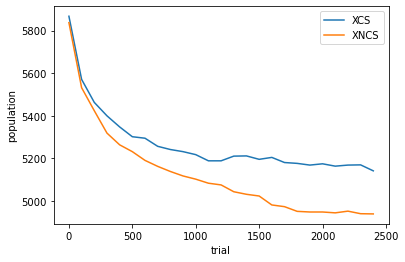

In [9]:
ax = df[['population', "population_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS"])

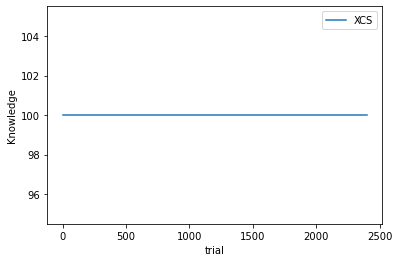

In [10]:
ax = df['knowledge'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Knowledge")
ax.legend(["XCS"])

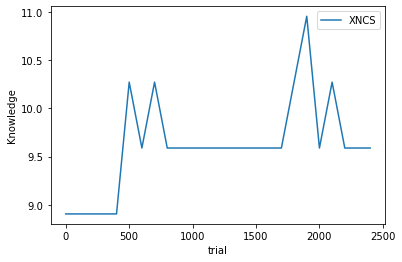

In [11]:
ax = df['knowledge_other'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Knowledge")
ax.legend(["XNCS"])

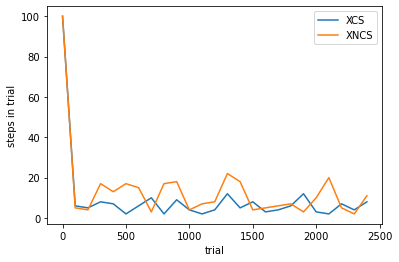

In [12]:
ax = df[['steps_in_trial', 'steps_in_trial_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS"])

In [13]:
print(sum(df["steps_in_trial"])/number_of_experiments)
print(sum(df["steps_in_trial_other"])/number_of_experiments)

239.0
341.0
